In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import logging
from risks.data.fetch.sentinel2 import Sentinel2
from IPython.display import Image

# Configure logging to display in Jupyter
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    force=True,  # This ensures the configuration is applied even if logging was previously configured
)
logger = logging.getLogger(__name__)


sentinel2 = Sentinel2()

polygon = {
    "type": "Feature",
    "properties": {},
    "geometry": {
        "coordinates": [
            [
                [10.235198982658801, 51.42076009745068],
                [10.236477278753114, 51.41697045550828],
                [10.244461712820623, 51.41823370440062],
                [10.242888425319222, 51.4220355049745],
                [10.235198982658801, 51.42076009745068],
            ]
        ],
        "type": "Polygon",
    },
}
start_date="2024-06-27"
end_date="2024-12-31"


ndvi_images = sentinel2.load_ndvi_images(
    start_date=start_date,
    end_date=end_date,
    polygon=polygon,
    cropped_image_cloud_cover_threshold=80,
    entire_image_cloud_cover_threshold=20,
)

ndvi_thumbnails = sentinel2.ndvi_thumbnails(
    ndvi=ndvi_images, polygon=polygon, polygon_crs="EPSG:4326"
)
mean_ndvi_values = sentinel2.calculate_mean_ndvi(
    ndvi_images=ndvi_images,
    polygon=polygon,
    polygon_crs="EPSG:4326",
    interpolate=True,
    start_date=start_date,
    end_date=end_date,
)


2024-12-13 14:54:10,229 - risks.data.fetch.sentinel2 - INFO - Loading NDVI data
2024-12-13 14:54:10,229 - risks.data.fetch.sentinel2 - INFO - Loading Sentinel-2 data for bands ['B08', 'B04'] at 10m resolution
2024-12-13 14:54:10,230 - risks.data.fetch.sentinel2 - INFO - Searching for Sentinel-2 items between 2024-06-27 and 2024-12-31
2024-12-13 14:54:10,613 - risks.data.fetch.sentinel2 - INFO - Found 28 items
2024-12-13 14:54:10,614 - risks.data.fetch.sentinel2 - INFO - Signing items for access
2024-12-13 14:54:10,631 - risks.data.fetch.sentinel2 - INFO - Loading data into xarray Dataset


  0%|          | 0/57 [00:00<?, ?it/s]

/Users/thimmzwiener/risk-reports/.venv/lib/python3.12/site-packages/rasterio/warp.py:387: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dest = _reproject(
2024-12-13 14:54:13,027 - risks.data.fetch.sentinel2 - INFO - Dataset time steps before filtering: 19
2024-12-13 14:54:13,028 - risks.data.fetch.sentinel2 - INFO - Filtered dataset to 15 time steps based on 80% cloud cover threshold
2024-12-13 14:54:13,033 - risks.data.fetch.sentinel2 - INFO - Successfully loaded Sentinel-2 data
2024-12-13 14:54:13,034 - risks.data.fetch.sentinel2 - INFO - Successfully calculated NDVI
2024-12-13 14:54:13,433 - risks.data.fetch.sentinel2 - INFO - Calculating mean NDVI values for polygon
2024-12-13 14:54:13,441 - risks.data.fetch.sentinel2 - INFO - Calculated mean NDVI for 188 timestamps


<Axes: >

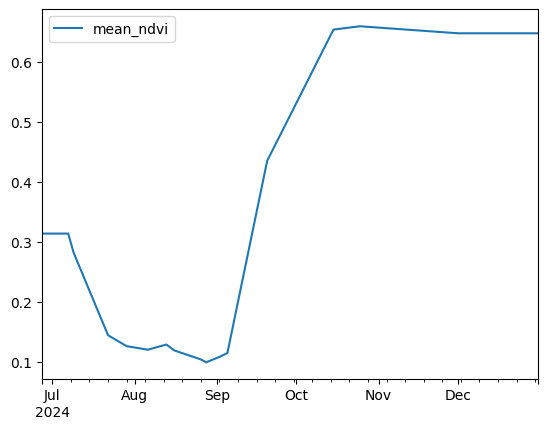

In [3]:
mean_ndvi_values.plot()